# Apple Stock Analysis

## Abstract

The goal of this project is to use **Panda Series** for analyzing the Apple stock data from 1982 to till date. 

#### To enable multiple output

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Apple Stock Data Extraction

In order to get the stock information we need to install **pandas-datareader** package. 
This package allow to obtain stock information.

#### Importing reqired packages

In [2]:
import pandas as pd
from pandas_datareader import DataReader  #To obtain stock information
import datetime
from datetime import timedelta, date

#### Function that takes tickers,start/end date as input and that returns a dataframe with the stock information

In [3]:
def get(tickers, startdate, enddate):
  stock=DataReader(tickers,'yahoo',start=startdate,end=enddate)
  return stock

#### Extracting stock information for Apple from 1982 to till date

In [4]:
aapl_stock_data = get('AAPL','1982-1-1',datetime.date.today())

## Plotting graph for the 'Close' series

In [5]:
stock_close=aapl_stock_data['Close']

#### Using %magic command to activate inline matplotlib graphs to plot the 'Close' series

Populating the interactive namespace from numpy and matplotlib


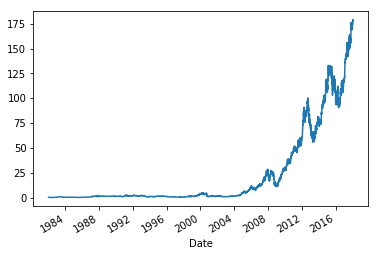

In [7]:
%pylab inline
stock_close.plot()

#### Overview of the Close Series

In [8]:
stock_close.describe()

count    9093.000000
mean       22.799795
std        39.759379
min         0.196429
25%         1.092857
50%         1.669643
75%        23.587143
max       179.259995
Name: Close, dtype: float64

Following can be observed from the close series-
* Closing price of the Apple stock has increased from 19.6 cents per stock in 1982 to 179.25 dollars per stock in 2018.
* Average closing price is 22.76 dollars in last 36 years.

## Three approaches to obtain maximum closing price and difference among them

#### Approach 1:

In [9]:
stock_close.max()

179.259995

#### Approach 2:

In [10]:
stock_close[:stock_close.last_valid_index()].sort_values()[-1]

179.259995

#### Approach 3:

In [11]:
stock_close.nlargest(1)[-1]

179.259995

#### Difference in these approches:

**nlargest()** function uses list underneath, hence it converts the data into list where items are ordered as a heap. heap[0] is always the smallest item. nlargest() function is more appropriate if you are trying to find relatively small number of items. 

To find single largest item, **max()** function is faster to use.

**sort_value()** function by default sort the items in ascending order and includes the nan as well. When used with **last_valid_index()** function it will exclude nan values and then the last item can be considered as largest. It's a lengthy approach and this approach is not very easy to read and understand.

## Analysis based on Stock Price Surge

#### Surge Percent Calculation with respect to previous closing price-

Surge percentage for today= (Today price-Previous day price)/Previous day price

eg: previous_day_price=80; today_price=100
     Surge percent %= (100-80)/80 = 25%
     
This can also be achieved by using **pct_change()** function with appropriate parameter

### Finding five timeframes with highest stock price surge in 5 days (in % compared to the closing cost of the previous trading day).

#### Calculating stock price surge in five days timeframe in a sliding window

In [12]:
five_day_surge=stock_close.pct_change(4)*100
five_day_surge.head(15)

Date
1982-01-04          NaN
1982-01-05          NaN
1982-01-06          NaN
1982-01-07          NaN
1982-01-08    -9.658985
1982-01-11   -10.778554
1982-01-12   -12.727258
1982-01-13    -5.921258
1982-01-14    -5.660574
1982-01-15     7.382686
1982-01-18    13.194205
1982-01-19    11.189050
1982-01-20     8.000096
1982-01-21     3.125079
1982-01-22     1.840649
Name: Close, dtype: float64

### Top five days from the five-day timeframe

In [13]:
five_day_surge.nlargest(5)

Date
1997-08-07    52.117274
1997-08-06    50.357120
1998-01-06    43.601879
1987-10-30    37.946400
1997-08-08    35.759481
Name: Close, dtype: float64

### Five days of the rolling window timeframe which has highest surge price   

#### Function to get the start date for the five-day time frame

In [14]:
def get_start_date_fivedayframe(ref,five_day_surge):
    start_dt=datetime.date(ref.year,ref.month,ref.day-5)
    if start_dt not in five_day_surge:
        start_dt=start_dt-datetime.timedelta(days=1)
    return start_dt

#### To get the date when the surge was highest

In [15]:
end_dt=five_day_surge.nlargest(1).index[0]
end_dt

Timestamp('1997-08-07 00:00:00')

In [16]:
start_dt=get_start_date_fivedayframe(end_dt,five_day_surge)
five_dat_timeframe=five_day_surge[start_dt:end_dt]
five_dat_timeframe

Date
1997-08-01    16.729977
1997-08-04    19.696887
1997-08-05    13.668989
1997-08-06    50.357120
1997-08-07    52.117274
Name: Close, dtype: float64

#### What happend during this timeframe?

In August 1997, Steve Jobs returned back to Apple as CEO. He addressed the Macworld Expo on 6th August 1997.In his keynote speech he announced that Apple had taken a 150 million dollars investment from its long-time rivals at Microsoft.

The fact that Jobs is back to Apple again and they are gaining good investments increased their stock price.

### Resampling the Close series to represent business quarters with a financial year that ends in September.

In [17]:
stock_by_quarter=stock_close.resample('Q-Sep').mean()
stock_by_quarter.head(10)

Date
1982-03-31    0.327765
1982-06-30    0.263747
1982-09-30    0.270752
1982-12-31    0.503418
1983-03-31    0.724383
1983-06-30    0.932504
1983-09-30    0.634173
1983-12-31    0.385877
1984-03-31    0.469530
1984-06-30    0.513676
Freq: Q-SEP, Name: Close, dtype: float64

### Identifying series of four quarters with an overall surge in the stock prices that is larger than 100 percent. 

#### Calculating stock price surge in rolling 4 quarters

In [18]:
stock_quarter_surge=stock_by_quarter.pct_change(3)*100
stock_quarter_surge.head(15)

Date
1982-03-31           NaN
1982-06-30           NaN
1982-09-30           NaN
1982-12-31     53.591136
1983-03-31    174.650733
1983-06-30    244.412806
1983-09-30     25.973408
1983-12-31    -46.730248
1984-03-31    -49.648539
1984-06-30    -19.000565
1984-09-30     24.396280
1984-12-31     -3.813244
1985-03-31     -7.204118
1985-06-30    -28.520807
1985-09-30    -36.665822
Freq: Q-SEP, Name: Close, dtype: float64

#### Series of four quarter when surge was greater than 100% and its visualization

In [19]:
Surge_quarter=stock_quarter_surge[stock_quarter_surge>100]

Populating the interactive namespace from numpy and matplotlib


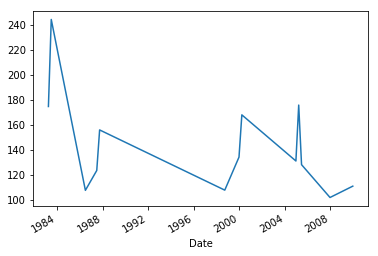

In [20]:
%pylab inline
Surge_quarter.plot()

### Finding the time when largest surge happened

In [21]:
Max_Surge_quarter_Date=Surge_quarter.nlargest(1)
Max_Surge_quarter_Date

Date
1983-06-30    244.412806
Name: Close, dtype: float64

#### Why the largest surge happened?

During the quarter Q3-'1983-06-30'following things happended resulted in rising the stock price surge-
* Apple launched Lisa Computer, which was the first one to have point-and-click base GUI system with mouse and on-screen icons - a major stride in simplifying computers for everyday users
* In April 1983, Sculley [former Pepsi president] became CEO of Apple
* Steve Wozniak, Co-founder of Apple, also returned to Apple in June 1983
* Apple came up with a phone design which can be said a base for iphone

Ref:

http://www.pophistorydig.com/topics/early-apple-1976-1985/

https://www.cultofmac.com/160670/apple-built-the-original-iphone-way-back-in-1983-heres-the-pics/ 


### Visualize the stock price for the quarters with the highest price surge.

#### To get the highest surge quarter date

In [22]:
Surge_quarter_Date=pd.Timestamp.date(Max_Surge_quarter_Date.index[0])
Surge_quarter_Date

datetime.date(1983, 6, 30)

#### Function to get the start date of the quarter

In [23]:
def quarter_start(ref):
    if ref.month < 4:
        return datetime.date(ref.year - 1, 12, 31)+timedelta(days=1)
    elif ref.month < 7:
        return datetime.date(ref.year, 3, 31)+timedelta(days=1)
    elif ref.month < 10:
        return datetime.date(ref.year, 6, 30)+timedelta(days=1)
    return datetime.date(ref.year, 9, 30)

In [24]:
quarter_start_date=quarter_start(Surge_quarter_Date)
quarter_start_date

datetime.date(1983, 4, 1)

#### All stock close price for the Highest surge quarter

In [25]:
Highest_Surge_Q_Price=aapl_stock_data[quarter_start_date:Surge_quarter_Date]['Close']
Highest_Surge_Q_Price.head(10)

Date
1983-04-04    0.734375
1983-04-05    0.720982
1983-04-06    0.714286
1983-04-07    0.707589
1983-04-08    0.703125
1983-04-11    0.743304
1983-04-12    0.758929
1983-04-13    0.785714
1983-04-14    0.803571
1983-04-15    0.816964
Name: Close, dtype: float64

#### Visualization for the stock price for the quarters with the highest price surge

Populating the interactive namespace from numpy and matplotlib


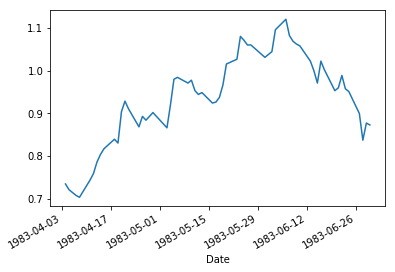

In [26]:
%pylab inline
Highest_Surge_Q_Price.plot()